# Ch 3 - Descriptive Statistics

Descriptive statistic normally applies to the analyzing data in a way that describes, shows, or summarizes data in a meaningful way. **We do not draw conclusions from descriptive statistics**!!  That is the art of inferential statistics, which we will explore in the next chapter.  Let us differentiate the two:
* Suppose that we take a sample of everyone's age in the class
* We can use **descriptive statistics** to summarize the data that is collected (mean, median, standard deviation, quantiles, ...)
* We would use **inferential statistics** to infer information about graduate students enrolled in a masters program at Michigan Tech.  
Often, we want to infer information about a **population**, but are only able to observe a part of the population, known as the **Sample**.

Goal for this module:
* Learning statistical terms and concepts to describe a data sample.
* Using Python to recover descriptive statistics of data
* More experience visualizing data using Python

## Data - Wine Quality 

I will cover a separate example with roughly the same topics/layout as our textbook, so that you have two distinct examples to work from.  The data set I have chosen to use is the wine quality data set from the UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/datasets/Wine+Quality.  

As we will see, this data set provides many attributes of wine, including a summary "quality score" based on an expert opinion.  We may visit this data set in a later week to try and use machine learning to assign a quality score based on wine attributes.  For now, we are just interested in generating **descriptive statistics** from the data.  First, lets setup our python libraries and toolboxes.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

### Data Preparation

One of the reasons we are using a general-purpose language such as Python is that for many projects the *hard* part is preparing the data, not doing the analysis.

The most common steps are:

1. **Getting the data**. Data can be directly read from a file or it might be necessary to scrap the web.
2. **Parsing the data**.  Of course, this depends on what format it is in: plain text, fixed columns, CSV, XML, HTML, etc.
3. **Cleaning the data**.  Survey responses and other data files are almost always incomplete.  Sometimes there are multiple codes for things like, *not asked*, *did not know*, and *declined to answer*. And there are almost always errors. A simple strategy is to remove or ignore incomplete records.
4. **Building data structures**. Once you read the data, you usually want to store it in a data structure that lends itself to the analysis you want to do.

If the data fits into memory, building a data structure is usually the way to go.   If not, you could build a database, which is an out-of-memory data structure. Most databases provide a mapping from keys to values, so they are like dictionaries.


For this notebook, we will pull our data directly from the UCI repository. It turns out, there are two data sets: one for red one, one for white wine. Lets pull the data for the red wine. In this case, we are reading in a csv file (from the web) into a pandas dataframe object.

In [2]:
url  = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine = pd.read_csv(url)
wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


Oops, something went wrong.  

It looks like the data is not stored with a standard "," separator for the data.  Let's try this again, changing the optional argument for the separator.  

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [3]:
wine = pd.read_csv(url, 
                   sep = ";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


That's better.  Lets find out the number of observation and features (shape) of our data set

In [4]:
wine.shape

(1599, 12)

There are 1599 observations/samples and 12 features/attributes (columns).  

The "quality" column is in some sense the output variable.  Let's group by quality, and find out how many wines have a specific quality rating.

In [5]:
counts = wine.groupby('quality').size()
print(counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


In [6]:
# Another way to do this. 
counts = wine.groupby('quality').count().iloc[:,0]
counts

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: fixed acidity, dtype: int64

Most wines are mediocre (quality rating of 5 or 6).  Few wines are truly excellent or poor. 




## Descriptive Statistics

Let's proceed with some useful descriptive statistics. 

* mean, $\mu$ - the non-technical term is average 
* standard deviation, $\sigma$  (or variance $\sigma^2$) 
* quantiles / percentiles 
* distributions 


### Mean
Start with finding the mean pH of the wines, then the mean grouped by quality. 

In [7]:
meanPH = wine['pH'].mean()
print(meanPH)

3.3111131957473416


In [8]:
meanPhQuality = wine[['pH', 'quality']].groupby('quality').mean()
print(meanPhQuality)

               pH
quality          
3        3.398000
4        3.381509
5        3.304949
6        3.318072
7        3.290754
8        3.267222


Mathematically, how are these numbers obtained?  Well, we know for example, there are 10 wines with quality 3 (based on our counts above).  We can extract the pH values of these 10 wines.  The mean is the sum of the values divided by the number of values, $$\mu = \frac{1}{n} \sum_{i=1}^n x_i$$

In [9]:
# Let's look at the data for wines of quality 3
wine[wine['quality']==3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [10]:
# Let's print out just the pH variable for wines of quality 3
wine[wine['quality']==3 ]['pH']

459     3.25
517     3.16
690     3.63
832     3.38
899     3.48
1299    3.50
1374    3.32
1469    3.31
1478    3.40
1505    3.55
Name: pH, dtype: float64

In [11]:
# Calculate the mean pH of the quality 3 wines 
wine[wine['quality']==3]['pH'].mean()

3.3979999999999997

In [12]:
# We can also can also code in the calculation
my_sum = 0
for pH in wine[wine['quality']==3 ]['pH']:
    my_sum += pH
my_mean = my_sum/wine[wine['quality']==3 ]['pH'].size
print("mean pH of wine with quality 3 is " + str(my_mean) + ".")

mean pH of wine with quality 3 is 3.3979999999999997.


### Variance and Standard Deviation  
The mean is often not a sufficient descriptor of data.  One often cares about how the data *deviates* from the mean, the so-called "spread" of the data.    The common measurement is the mean squared deviation, $$\sigma^2 = \frac{1}{n} \sum_i(x_i-\mu)^2.$$  
The square root of variance, $\sigma$, is called the standard deviation. Lets use the group by function to find the standard deviation by quality, and then recover the standard deviation manually.

In [13]:
# Calculate the standard deviation pH of the quality 3 wines using 
#  built-in commands
a = wine[['pH','quality']].groupby('quality').std()
print(a)

               pH
quality          
3        0.144052
4        0.181441
5        0.150618
6        0.153995
7        0.150101
8        0.200640


In [14]:
# Calculate the standard deviation pH of the quality 3 wines manually 
my_sum = 0
for pH in wine[wine['quality']==3 ]['pH']:
    my_sum += (pH-my_mean) ** 2
my_variance = my_sum/(wine[wine['quality']==3 ]['pH'].size)
my_std = np.sqrt(my_variance)
print("(mean and standard deviation) of pH, wine with quality 3 is (%g,%g)."% (my_mean,my_std) ) 

(mean and standard deviation) of pH, wine with quality 3 is (3.398,0.13666).


Well, that's not quite the same.  The built-in `std( )` function gives a standard deviation of 0.144052 for wines of quality 3, and our manual calculation gives us a standard deviation of 0.13666.  What's going on?  This is a subtle point, related to populations and samples.  Here, our data set is assumed to be the entire **population** of red wines, so the formula, and manual implementation of standard deviation is correct.  What Python has computed is the "sample" standard deviation, $$s^2 = \frac{1}{n-1} \sum_i(x_i-\bar{x})^2.$$  The population and sample standard deviation is related by the formula $$ s^2 = \frac{n-1}{n}\sigma^2.$$  As $n\to\infty$, the population and sample standard deviation approach each other.

In [15]:
sample_std = my_std*np.sqrt( float(wine[wine['quality']==3 ]['pH'].size )
                            / (wine[wine['quality']==3 ]['pH'].size - 1))
print(sample_std)

0.1440524595802206


We can also use the `std` function, but use the `ddof` argument to change between the population and sample standard deviations.

In [16]:
a = wine[['pH','quality']].groupby('quality').std(ddof=0)
print(a)

               pH
quality          
3        0.136660
4        0.179721
5        0.150508
6        0.153874
7        0.149723
8        0.194987


A large variance (relative to the mean) indicates that at least some of the data is far from the mean and each other.  This raises the question, how do outliers affect our data?  While the mean of a sample is a very good descriptor of the sample, it can be drastically affected by an outlier.  



### Median  
One measure that is not affected by outliers, is the **median** of the data, that is, if we order all the entries according to their values, the median is the value that is in the middle of the ordered list.  

In [17]:
a = wine[['pH','quality']].groupby('quality').median()
print(a)

           pH
quality      
3        3.39
4        3.37
5        3.30
6        3.32
7        3.28
8        3.23


### Quantiles and Percentiles  
More generally, we can measure (and display) quantiles (or percentiles).   The median is the 0.5 quantile (50 percentile), i.e., 50% of the data is less than the median, 50% of the data is larger than the median.  The 0.25 quantile (25 percentile) means that 25% of the data is less than the 0.25 quantile, (100-25)% = 75% is larger than the 0.25 quantile.  Often, one uses the 5-number summary: $$[x_{min},Q_1,Q_2,Q_3,x_{max}],$$ where
* $x_{min}$ is the smallest value
* $Q_1$ is the first quartile, a.k.a., 0.25 quantile, aka. 25 percentile
* $Q_2$ is the second quartile, a.k.a., 0.5 quantile, aka. 50 percentile, a.k.a. median
* $Q_3$ is the third quartile, a.k.a., 0.75 quantile, aka. 75 percentile
* $x_{max}$ is the largest value

In [18]:
a = wine[['pH','quality']].groupby('quality').describe()
print(a)

            pH                                                     
         count      mean       std   min     25%   50%    75%   max
quality                                                            
3         10.0  3.398000  0.144052  3.16  3.3125  3.39  3.495  3.63
4         53.0  3.381509  0.181441  2.74  3.3000  3.37  3.500  3.90
5        681.0  3.304949  0.150618  2.88  3.2000  3.30  3.400  3.74
6        638.0  3.318072  0.153995  2.86  3.2200  3.32  3.410  4.01
7        199.0  3.290754  0.150101  2.92  3.2000  3.28  3.380  3.78
8         18.0  3.267222  0.200640  2.88  3.1625  3.23  3.350  3.72


Note again, that the std deviation number is not quite correct if we think of the data set as describing a **population**.

The quantiles can also be calculated with the `quantile( )` function.  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html

In [19]:
wine[['pH','quality']].groupby('quality').quantile(0.25)

,pH
quality,
3,3.3125
4,3.3000
5,3.2000
6,3.2200
7,3.2000
8,3.1625


In [20]:
wine[['pH','quality']].groupby('quality').quantile(0.5)

,pH
quality,
3,3.39
4,3.37
5,3.30
6,3.32
7,3.28
8,3.23




### Visualization -  Histograms
  
Alright, lets switch gears and by trying to visualize the distribution of data.  The most common representation of a distribution is a histogram. 

array([[<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>],
       [<Axes: title={'center': '5'}>, <Axes: title={'center': '6'}>],
       [<Axes: title={'center': '7'}>, <Axes: title={'center': '8'}>]],
      dtype=object)

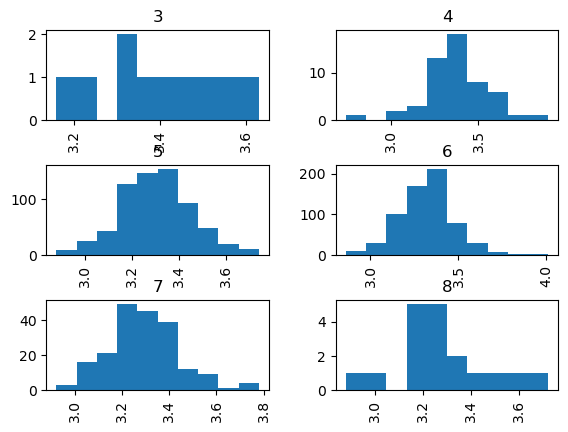

In [21]:
wine['pH'].hist(by=wine['quality'])

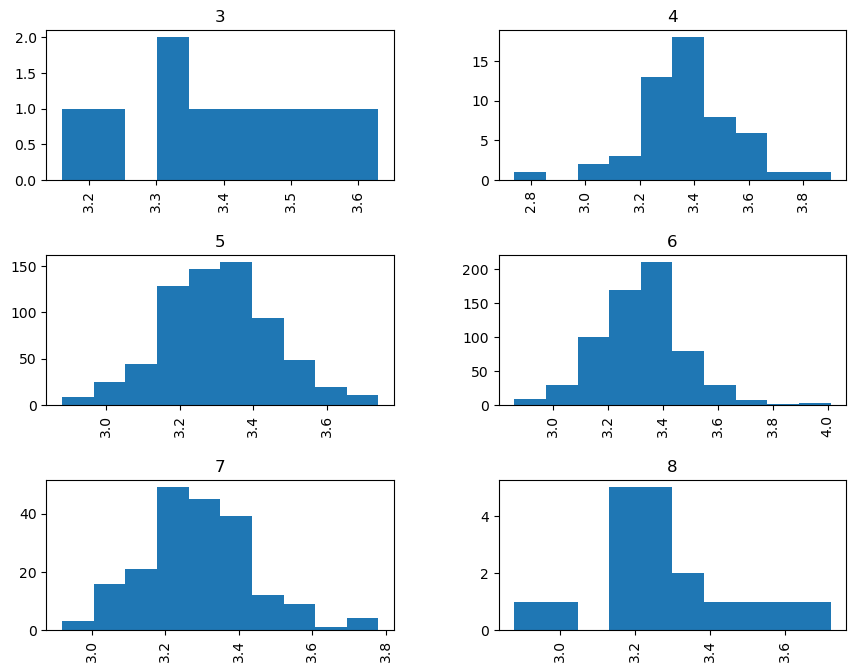

In [22]:
wine['pH'].hist(by=wine['quality'], 
                figsize=(10,8));

That's not very pretty.  Also, some wines only have a few observations, so a histogram is not informative.  We'll only worry about plotting the distribution of wines with quality 5, 6 and 7, since the other qualities do not have that many observations.

In [23]:
q5 = wine[wine['quality']==5 ]['pH']
q6 = wine[wine['quality']==6 ]['pH']
q7 = wine[wine['quality']==7 ]['pH']

Let's plot the distributions by using a histogram plot using the hist() function.  Note: pandas is capable of plotting several histograms in the same plot, but the results are sometimes difficult to read. In this case, they seem reasonable.

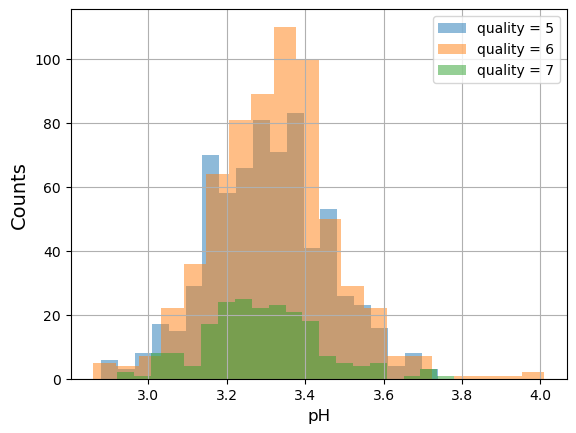

In [24]:
q5.hist(density=0, histtype='stepfilled', alpha=0.5, bins=20, 
        label='quality = 5')
q6.hist(density = 0, 
        histtype = 'stepfilled', 
        alpha = 0.5, 
        bins = 20, 
        label = 'quality = 6')
q7.hist(density=0, histtype = 'stepfilled', alpha=0.5, bins = 20, 
        label='quality = 7')
plt.xlabel('pH', fontsize=12)
plt.ylabel('Counts', fontsize=14)
plt.legend()

In the above plot, we are visualizing the frequency of values in our data set.  One can also normalize the plots by setting density=1 in the argument list to the hist function.  

The normalized histogram is called the *Probability Mass Function (PMF)*
 

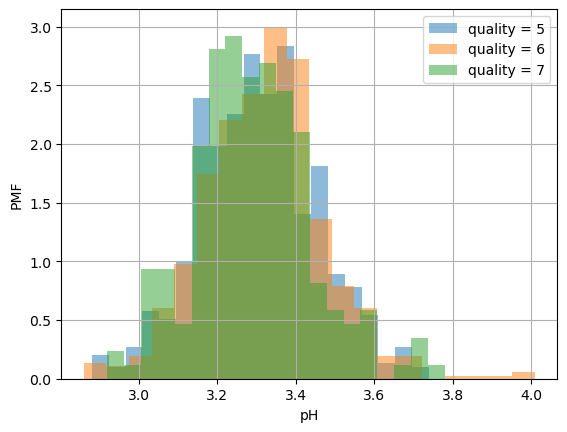

In [25]:
q5.hist(density=1, histtype='stepfilled', alpha=0.5, bins = 20, label='quality = 5')
q6.hist(density=1, histtype='stepfilled', alpha=0.5, bins = 20, label='quality = 6')
q7.hist(density=1, histtype='stepfilled', alpha=0.5, bins = 20, label='quality = 7')
plt.xlabel("pH")
plt.ylabel("PMF")
plt.legend()

An alternative way to view distribution is to the "cumulative distribution function", sometimes referred to as the CDF.  The dependent variable is, in this example the pH of the wine.  Lets label this variable $x$. Then for each value $x$, we count the frequency of values $y$ satisfying $y<x$, and divide this value by the total number of observations.  

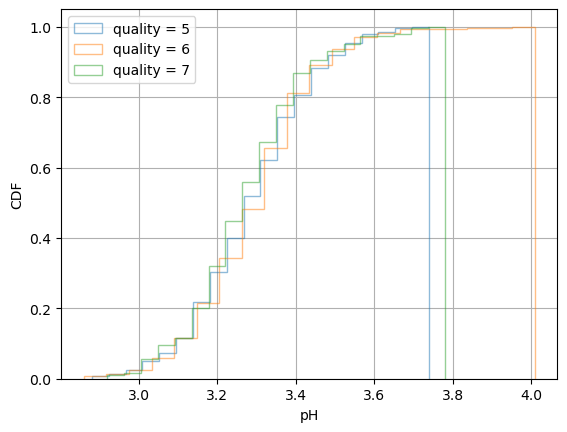

In [26]:
q5.hist(density=1, histtype='step', alpha=0.5, bins=20, label='quality = 5', 
        cumulative=True)
q6.hist(density=1, histtype='step', alpha=0.5, bins=20, label='quality = 6', 
        cumulative=True)
q7.hist(density=1, histtype='step', alpha=0.5, bins=20, label='quality = 7', 
        cumulative=True)
plt.xlabel("pH")
plt.ylabel("CDF")
plt.legend()

These still are hard to read with overlapping histograms, we will see an alternative that may be better below. 



#### Better Visualizations 

Overlapping histograms are not always easy to interpret.  

Let's try using functions in seaborn instead to view the data.  First, let's create the histogram. 

In [27]:
data_long = pd.concat([q5, q6, q7]).reset_index(drop = True)
qual = pd.Series(['quality = 5', 'quality = 6', 'quality = 7'])
qual = qual.repeat([len(q5), len(q6), len(q7)]).reset_index(drop = True)
df_long = pd.DataFrame({'pH': data_long, 'quality': qual})
df_long.head()

,pH,quality
0,3.51,quality = 5
1,3.20,quality = 5
2,3.26,quality = 5
3,3.51,quality = 5
4,3.51,quality = 5


<Axes: xlabel='pH', ylabel='Density'>

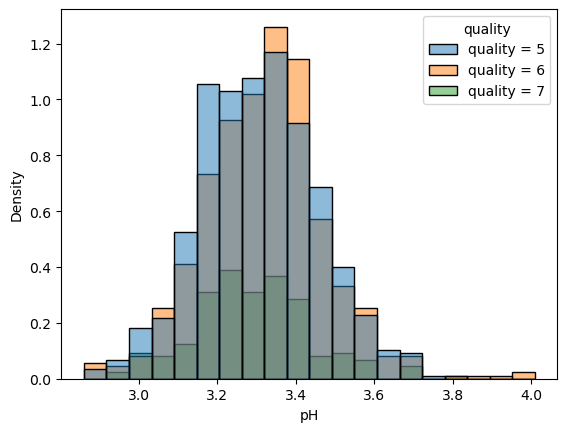

In [28]:
# import seaborn as sns    # note this should really go at the top of our notebook
sns.histplot(df_long, x='pH', stat='density', hue = 'quality', bins=20)

<Axes: xlabel='pH', ylabel='Density'>

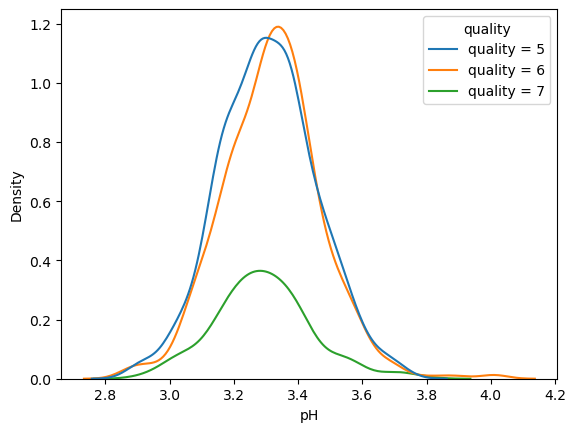

In [29]:
sns.kdeplot(df_long, x='pH',  hue = 'quality')

### Visualization - Box Plot

Instead of using histograms or CDFs to compare distributions of data, one could use box plots (a.k.a. cat-and-whisker plots) which show the five number summary (minimum, Q1, Q2, Q3, max)

Text(0, 0.5, 'pH')

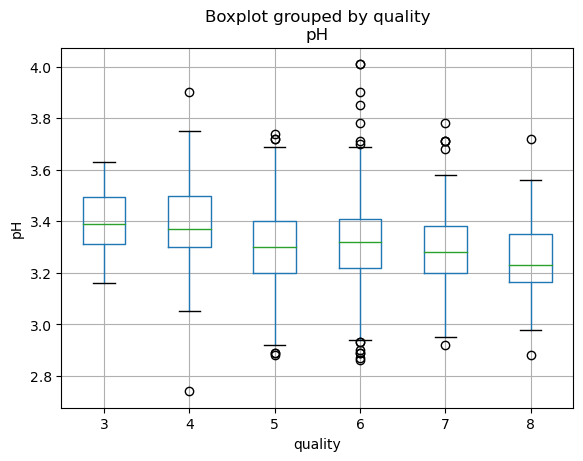

In [30]:
wine.boxplot(by="quality", column="pH")
plt.ylabel('pH')

In this cat-and-whisker plot, the lower and upper boundary of the box show Q1 and Q3 respectively.  Q2 is the green line.  The lower and upper fence is the minimum or maximum of the data, if no flagged or suspected outliers are present.  The default definition of an outlier is $3 IQR$ below the first quartile, or $3 IQR$ above the third quartile, where $IQR$ (the interquartile range), is the interval between Q1 and Q3. The default definition of suspected outlier is $1.5 IQR$ below the first quartile, or $1.5 IQR$ above the third quartile.  Here, suspected outliers are plotted in open circles, outliers (none present) would be plotted in filled circles.   

Sometimes, outliers are identified if they are 2 or 3 standard deviation away from the mean. It is important to specify in your plots, how outliers are being identified and handled.  

While box plots are useful, they don't give information about the actual distribution of the data.  We can use the seaborn package to create a violin plot: a plot that adds distributional information to a boxplot. 

<Axes: xlabel='quality', ylabel='pH'>

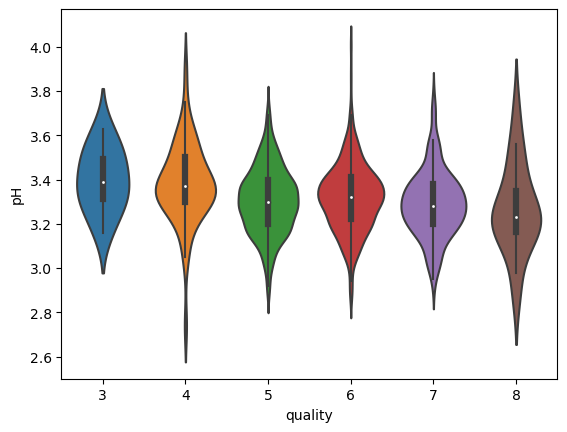

In [31]:
sns.violinplot(x="quality", y='pH', data=wine)

Here, we can visualize very quickly that the distributions are fairly normal regardless of quality, wines with quality 8 have the most variability (more spread out), wine with quality 4 and 6 have more outliers.  These plots also sometimes indicate *skewness* of a data set, i.e., how asymmetric a data might be.  Skewness if defined as $$g = \frac{1}{n} \frac{\sum_i(x_i - \mu)^3}{\sigma^3},$$ where $\mu$ is the mean, $\sigma$ is the standard deviation, and $n$ is the number of observations.

In [32]:
def skewness(x):
    sum = 0
    mu = x.mean()
    s = x.std()
    for i in x:
        sum += (i-mu)**3
    sum /= (len(x)* s**3)
    return sum
print("Skewness of wine pH, quality = 5 is ", skewness(q5))  
print("Skewness of wine pH, quality = 6 is ", skewness(q6)) 
print("Skewness of wine pH, quality = 7 is ", skewness(q7))  

Skewness of wine pH, quality = 5 is  0.053054941778030676
Skewness of wine pH, quality = 6 is  0.30138219498513563
Skewness of wine pH, quality = 7 is  0.3771665026575666


So, pH of wine with quality 5 is least skewed compared to wines with quality 6 and 7.  The book also describes a simpler measure of skewness: the "Pearson's median skewness coefficient, which measures differences between the median and mean (note typo in book definition and code) $$ g = 3 \frac{(mean - median)}{\sigma}$$

In [33]:
def pearson_skewness(x):
    mu = x.mean()
    s = x.std()
    nu = x.median()
    return 3*(mu-nu)/s
print ("Pearson skewness of wine pH, quality = 5 is ", pearson_skewness(q5))    
print ("Pearson skewness of wine pH, quality = 6 is ", pearson_skewness(q6))  
print ("Pearson skewness of wine pH, quality = 7 is ", pearson_skewness(q7)) 

Pearson skewness of wine pH, quality = 5 is  0.09856571560670753
Pearson skewness of wine pH, quality = 6 is  -0.03755768486773939
Pearson skewness of wine pH, quality = 7 is  0.21493100585565186


Notice that by this measure, wine with quality 7 is still most skewed. Wine with least skewness is now wine quality 6.

### Distributions
This is a good time to introduce two common distributions.  Most famous is the normal (Gaussian) distribution.
$$ N(x,\mu,\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right),$$ where $\mu$ is the mean and $\sigma$ is the standard deviation.

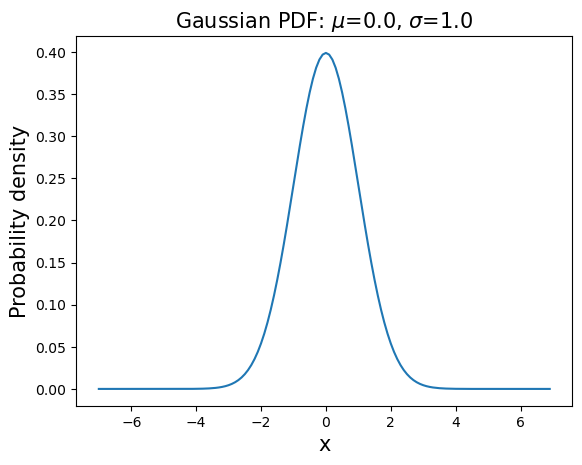

In [34]:
u=0  # mean
s=1  # standard deviation 
x=np.arange(0,14,0.1)-7
y=(1/(np.sqrt(2*np.pi*s**2)))*np.exp(-(((x-u)**2)/(2*s*s)))
plt.plot(x,y,'-')
plt.title('Gaussian PDF: $\mu$=%.1f, $\sigma$=%.1f' % (u,s),fontsize=15)
plt.xlabel('x',fontsize=15)
plt.ylabel('Probability density',fontsize=15)
plt.show()

Another common distribution is the exponential distribution, $$ PDF(\lambda,x) = \lambda \exp^{- \lambda x}$$

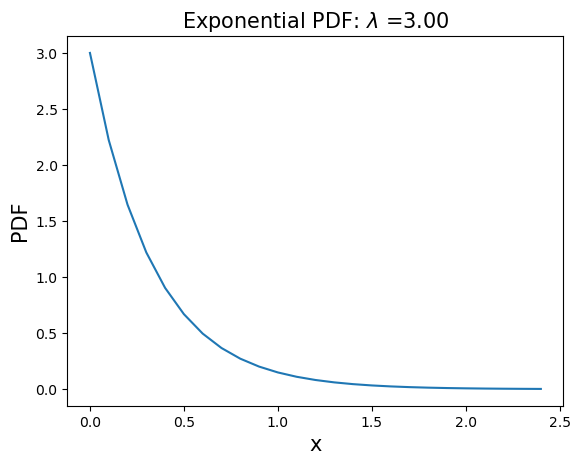

In [35]:
l = 3
x=np.arange(0,2.5,0.1)
y= l * np.exp(-l*x)
plt.plot(x,y,'-')
plt.title('Exponential PDF: $\lambda$ =%.2f' % l, fontsize=15)
plt.xlabel('x', fontsize=15)
plt.ylabel('PDF', fontsize=15)
plt.show()

### Inferential Statistics

Whereas descriptive statistics strives to describe a given data set, we are often interested in using samples to describe a population.  *Estimation* is the process of inferring the parameters (e.g. mean) of a distribution from a statistics of samples drawn from a population. The *statistic* we used is called the **estimator**.  We begin with estimating the mean and standard deviation of samples drawn from a normal distribution.  
* Suppose we take a random sample of $n$ objects to estimate the mean of the population, $\mu$.  Denote the sample mean as $\bar{x}$; $n$ is often referred to as the sample size.
* This sample mean could be a good estimator of the population mean, if there are no outliers.  
* Statisticians have shown (using the central limit theorem) that the sample mean approaches the population mean.
* The population variance can be estimated using an unbiased sample variance, 
$$s^2 = \frac{1}{n-1}\sum(x_i - \bar{x})^2.$$

To compare data with the standard normal distribution ($mu=0$, $s = 1$), one often normalizes using the $Z$-score (text uses terminology Standard Score).  The idea is to normalize the data,
$$ z_i = \frac{x_i - \mu}{\sigma}.$$
Chapter 4 will explore inferential statistics in more detail.   The remainder of chapter 3 explores multi-variate statistics, and correlation between variables.

## Multivariate Descriptive Statistics

### Covariance 

Often, our observations will include multiple variables.  In our wine example, we had fixed acidity, volatile acidity, citric acid, residual sugar,... 
* If larger values in one variable correspond to larger values in a different variable, we say the the variables are correlated, and the covariance is positive.
* If larger values in one variable correspond to smaller values in a different variable, we say the the variables are correlated, and the covariance is negative.
* hence ,the sign of the covariance shows the tendency in the linear relationship between the two random variables.
* A scatter matrix is a useful way to try and discover linear relationships between variables

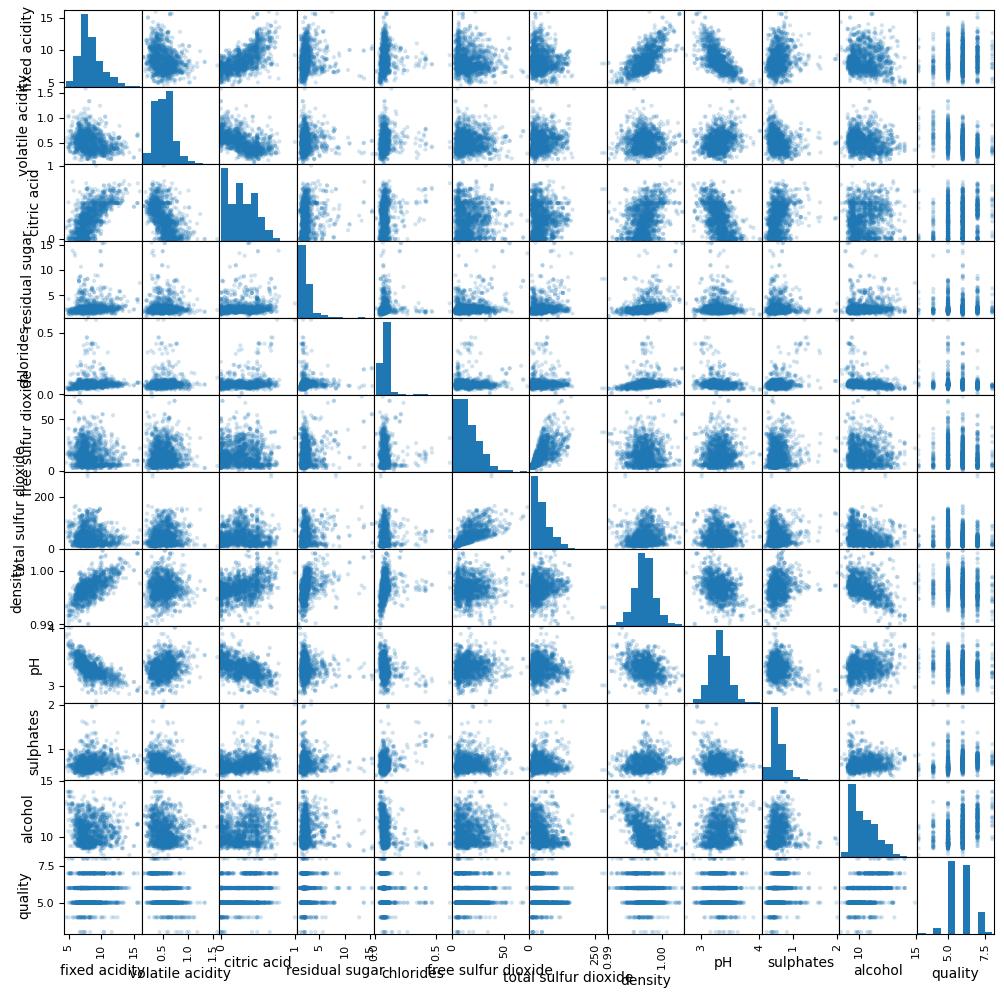

In [36]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(wine, alpha=0.2, figsize=(12,12))
plt.show()

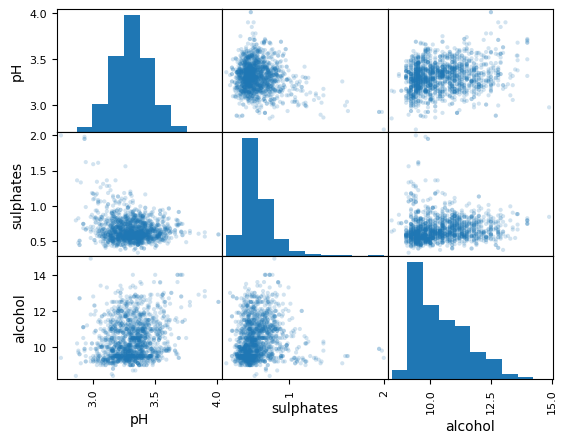

In [37]:
pd.plotting.scatter_matrix(wine[ ["pH","sulphates","alcohol"] ],alpha=0.2)
plt.show()

## Additional Visualizations



###  Density Plots 

Text(0.5, 0, 'pH')

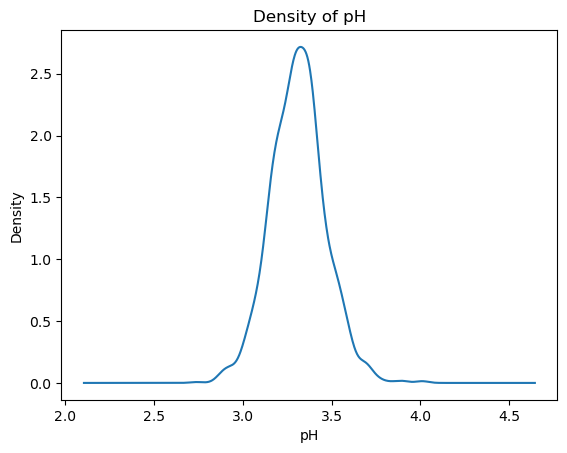

In [38]:
pH = wine['pH']
plt.figure()
ax = pH.plot.kde(title='Density of pH')
ax.set_xlabel("pH")

We can also look at the density of pH grouped by wine quality. 

In [39]:
import seaborn as sns
sns.set(color_codes=True)

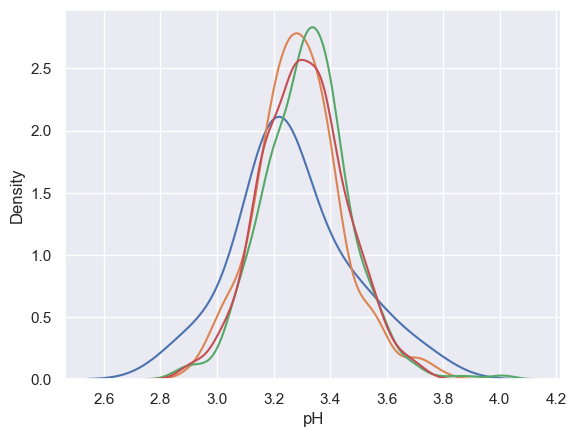

In [40]:
sns.kdeplot(wine.pH[wine.quality == 8], label=8);
sns.kdeplot(wine.pH[wine.quality == 7], label=7);
sns.kdeplot(wine.pH[wine.quality == 6], label=6);
sns.kdeplot(wine.pH[wine.quality == 5], label=5);

### Bar Plots

In [41]:
counts = wine.groupby('quality').size()
print(counts)

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64


Text(0, 0.5, 'Number')

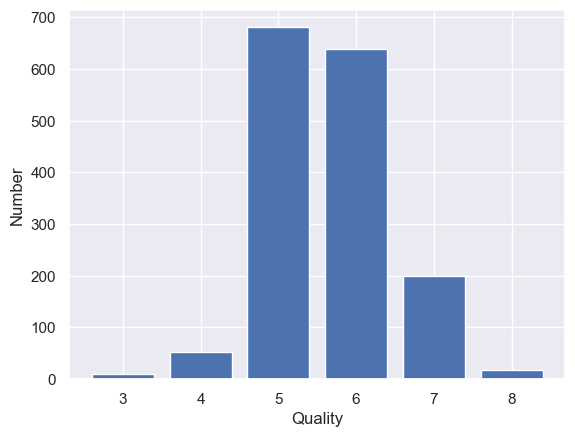

In [42]:
plt.figure();
plt.bar([3,4,5,6,7,8],counts)
plt.xlabel("Quality")
plt.ylabel("Number")

### 2D Histograms

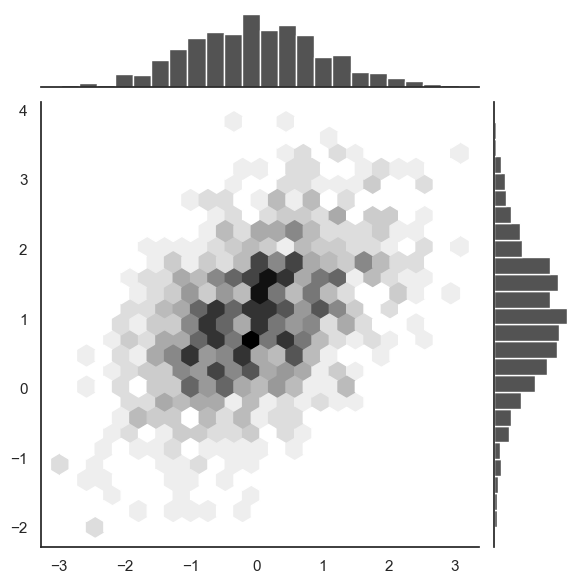

In [43]:
from scipy import stats, integrate
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df2 = pd.DataFrame(data, columns=["x", "y"])
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

### Scatter plots

<Axes: xlabel='pH', ylabel='alcohol'>

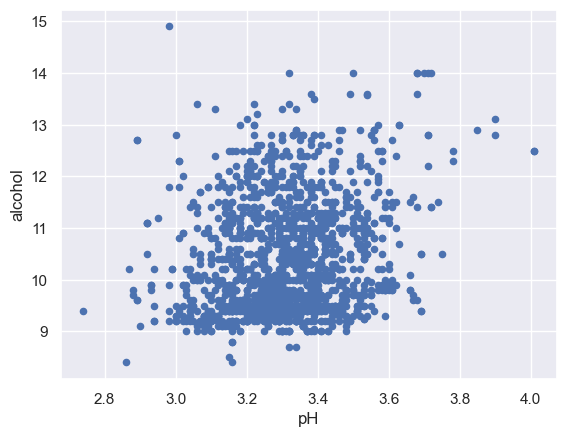

In [44]:
wine.plot.scatter(x="pH", y="alcohol")